In [5]:
!pip3 install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.2+cpu (from versions: 1.11.0)
ERROR: No matching distribution found for torch==1.8.2+cpu


In [33]:
!git clone https://github.com/ultralytics/yolov5

C:\Users\surya\OneDrive\Documents\195f


In [20]:
!pip install -r requirements.txt

     ---------------------------------------- 7.2/7.2 MB 10.2 MB/s eta 0:00:00
  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)
     --------------------------------------- 37.0/37.0 MB 12.8 MB/s eta 0:00:00
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
     --------------------------------------- 10.6/10.6 MB 16.0 MB/s eta 0:00:00
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached thop-0.0.31.post2005241907-py3-none-any.whl (8.7 kB)
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.30.0-py3-none-any.whl (898 kB)
     ---------------------------------------- 51.4/51.4 KB 2.6 MB/s eta 0:00:00
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached google_auth-2.6.0-py2.py3-none-any.whl (156 kB)
     ---------------------------------------- 3.4/3.4 MB 15.6 MB/s eta 0:00:00
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.w

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

C:\Users\surya\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import uuid  
import os
import time

In [27]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [26]:
!pip install pyqt5 lxml --upgrade

In [28]:
cd labelImg

C:\Users\surya\OneDrive\Documents\195f\labelImg


In [29]:
!pyrcc5 -o libs/resources.py resources.qrc

In [8]:
cd ..

C:\Users\surya\OneDrive\Documents\195f


In [6]:
!pip install wandb

In [3]:
!python train.py --img 320 --batch 16 --epochs 200 --data dataset.yml --weights yolov5s.pt --workers 2

^C


In [2]:
cd yolov5

C:\Users\surya\OneDrive\Documents\195f\yolov5


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/real_exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\surya/.cache\torch\hub\master.zip
YOLOv5  2022-5-12 torch 1.8.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

import uuid   # Unique identifier
import os
import time

C:\Users\surya\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
img = 'irobot/frames/trim_33/2.JPG'

In [10]:
results = model(img)

In [11]:
results.print()

image 1/1: 1280x720 1 Sphero
Speed: 15.0ms pre-process, 250.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 384)


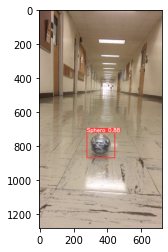

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [1]:
cd yolov5

C:\Users\surya\OneDrive\Documents\195f\yolov5


In [22]:
cd ..

C:\Users\surya\OneDrive\Documents\195f


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

C:\Users\surya\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/real_exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\surya/.cache\torch\hub\master.zip
YOLOv5  2022-5-12 torch 1.8.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
# simple script to see detections of sphero in a video
cap = cv2.VideoCapture("irobot/videos/trim_32.mp4")
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 0)
while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)


    cv2.imshow('YOLO', np.squeeze(results.render()))

    key = cv2.waitKey(30)

    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
# script to get the real time area of the sphero in a video
cap = cv2.VideoCapture("resized.mp4")


while True:
    ret, frame = cap.read()
    
    results = model(frame)
    
    
    
    x_min = results.pandas().xyxy[0]['xmin']
    y_min = results.pandas().xyxy[0]['ymin']
    x_max = results.pandas().xyxy[0]['xmax']
    y_max = results.pandas().xyxy[0]['ymax']
    
    dw = 1./(640)
    dh = 1./(640)
    w = x_max - x_min
    h = y_max - y_min
    w = w*dw
    h = h*dh
    
    a = w*h
    print(a)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    key = cv2.waitKey(30)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], d